In [51]:
import torch
import matplotlib.pyplot as plt
from src.utility.eval_utils import calc_loss_metrics
import pandas as pd

In [133]:
preds,_ = torch.rand((85)).sort()
preds = preds.detach()+1.
depths = torch.ones((85))


def uncertainty_results_df(fineness, sorted_preds,sorted_targets):
    df = pd.DataFrame(columns=["Share"]+[el for el in calc_loss_metrics(preds,depths).keys()])
    for i in range(len(sorted_preds)//fineness+1): #increment in thousandths
        print(calc_loss_metrics(sorted_preds[i*fineness:],sorted_targets[i*fineness:]).values()
    )
        df.loc[i]=[(i*fineness)/(len(sorted_preds))]+[el.numpy(force=True) for el in calc_loss_metrics(sorted_preds[i*10:],sorted_targets[i*10:]).values()]
    return df

def plot_uncertainy_df(df):
    for i,c in enumerate(df.columns):
        if c !="Share":
            #axs[i].plot(df[[c]])
            plt.plot(df[["Share"]],df[[c]])
            plt.xlabel("Uncertainty: Share of predictions")
            plt.ylabel(c)
            plt.title(f"{c} as uncertainty increases")
            plt.savefig(fname="test"+c)
            plt.clf()
df = uncertainty_results_df(10,preds,depths)
.to_csv("uncertainty_df")
plot_uncertainy_df(df)

AttributeError: 'str' object has no attribute 'to_frame'

Index(['Share', 'delta1', 'delta2', 'delta3', 'abs_rel', 'rmse', 'log_10',
       'rmse_log', 'silog', 'sq_rel', 'silogloss_loss_func', 'mse_loss_func'],
      dtype='object')


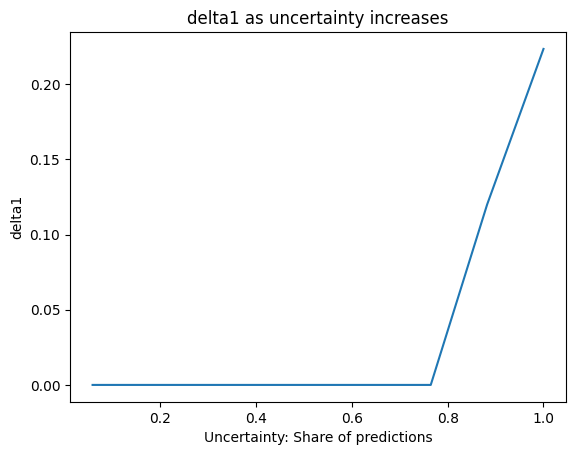

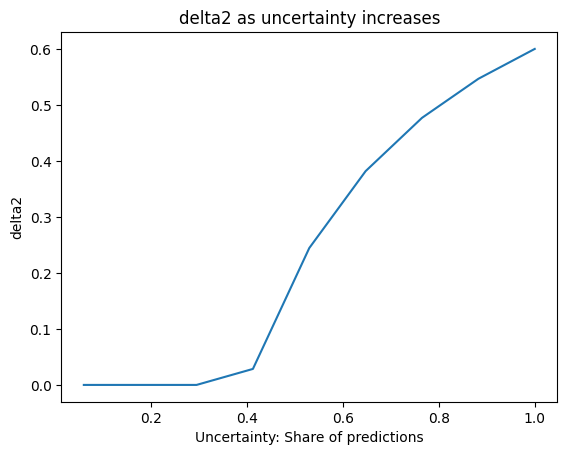

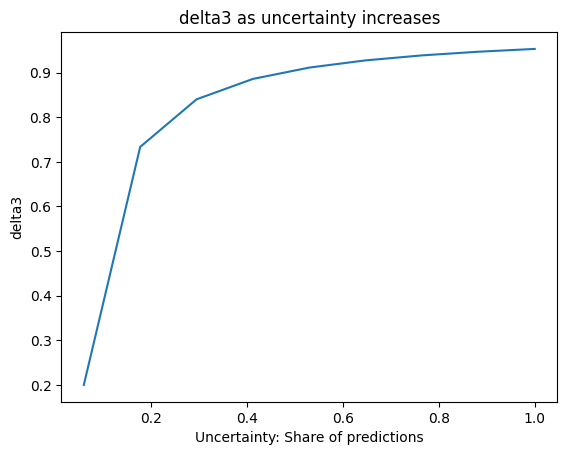

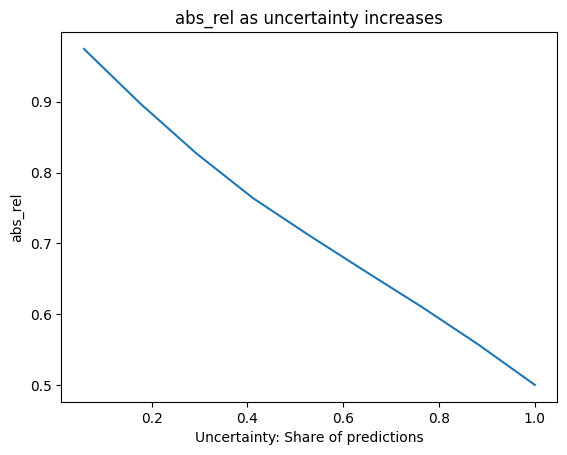

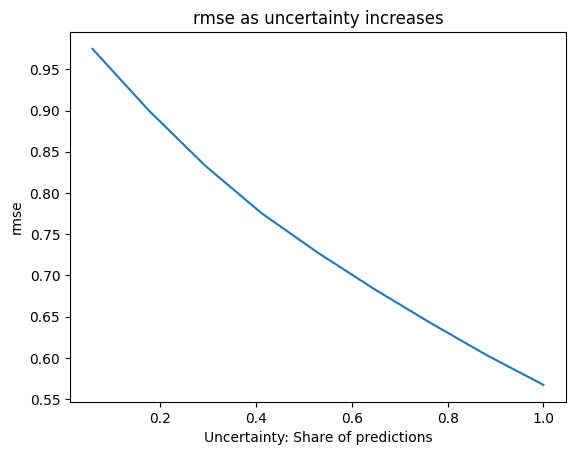

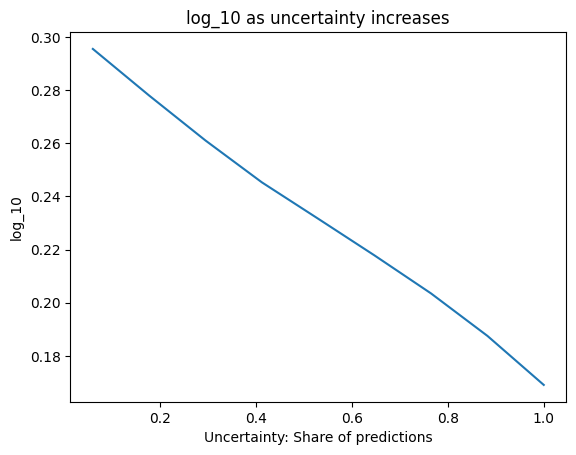

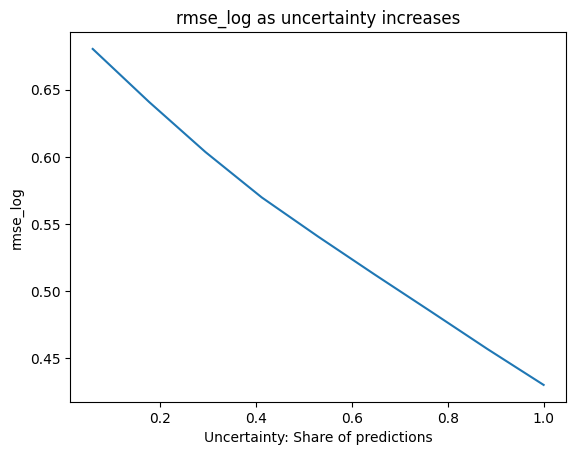

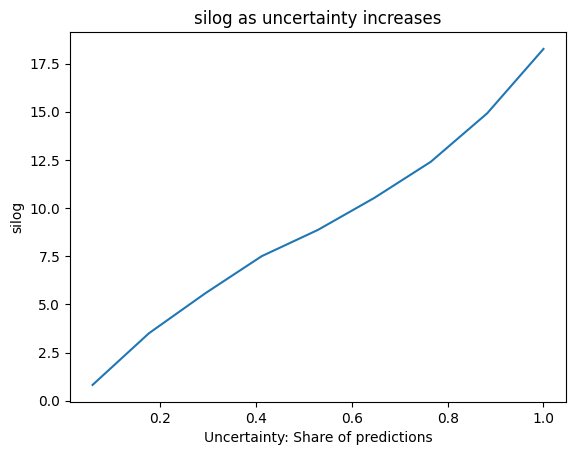

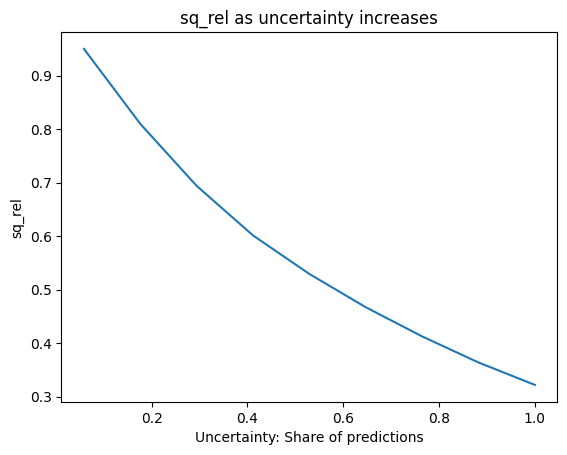

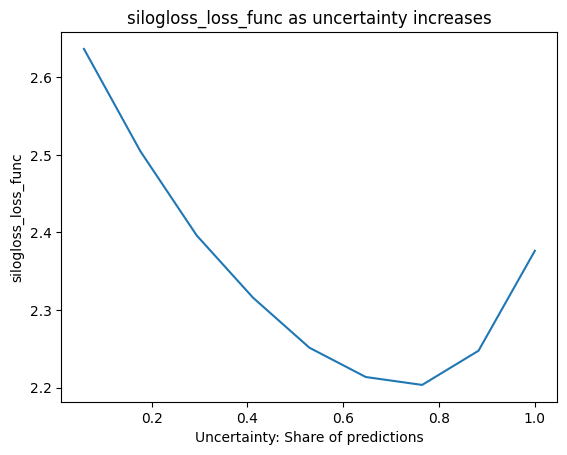

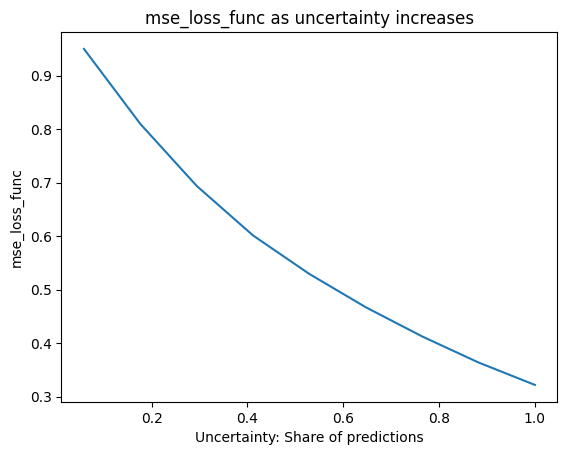

In [130]:
print(df.columns)
import numpy as np

# fig, axs = plt.subplots(len(df.columns)-1,1)

In [35]:
from src.models.modelImplementations.nnjUnet import stochastic_unet
from src.models.train_model import KITTI_depth_lightning_module
from torch.nn import MSELoss
import torchinfo
import pprint

from omegaconf import DictConfig, OmegaConf

cfg = DictConfig(
    {
        "hyperparameters": {"batch_size": 10, "learning_rate": 1},
        "trainer_args": {"max_epochs": 80},
        "models": {"model_type": "stochastic_unet"},
        "neural_net_param_multiplication_factor": 32,
        "dataset_params": {"max_depth": 10, "min_depth": 5, "input_width": 10, "input_height": 100},
    }
)
KITTI_depth_lightning_module(
    model=stochastic_unet(in_channels=3, out_channels=1, cfg=cfg),
    loss_function=MSELoss(),
    cfg=cfg,
    steps_per_epoch=5,
)

1.0 5


KITTI_depth_lightning_module(
  (model): stochastic_unet(
    (stochastic_net): Sequential(
      (0): Conv2d(3, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (1): Tanh()
      (2): Conv2d(32, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (3): Tanh()
      (4): SkipConnection(
        (_F): Sequential(
          (0): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
          (1): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
          (2): Tanh()
          (3): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
          (4): Tanh()
          (5): SkipConnection(
            (_F): Sequential(
              (0): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
              (1): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
              (2): Tanh()
              (3): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
              (4

AttributeError: type object 'KITTI_depth_lightning_module' has no attribute '_modules'